In [ ]:
import pandas as pd
import numpy as np

**Importing the breast cancer dataset for data visualization, exploration and processing.**

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("breast-cancer.csv") 
df.head()

Saving breast-cancer.csv to breast-cancer (2).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**The first 10 attributes (radius mean, texture mean, perimeter mean, area mean, smoothness mean, compactness mean, concavity mean, concave points mean, symmetry mean, and fractal dimension) are measures of the tumor's size, shape, and texture based on a digital image of a biopsy. The next 10 attributes (radius se, texture se, perimeter se, area se, smoothness se, compactness se, concavity se, concave points se, symmetry se, and fractal dimension se) are the standard errors of these same measurements, which indicate the variability or uncertainty of the estimates. The last 10 attributes (radius worst, texture worst, area worst, smoothness worst, concavity worst, concave points worst, symmetry worst, and fractal dimension worst) are the "worst" or largest values of these measurements observed in the biopsy, which indicate the aggressiveness or malignancy of the tumor. These features can be used to build a machine learning model for breast cancer prediction or diagnosis.**

**Therefore, we are concentrating on finding the most correlated attributes on 3 different sets i.e., first 10, second 10 and the last, inorder to build a machine learning model for breast cancer prediction or diagnosis.**

**We are actually finding Correlation matrix inorder to find the relation between individual attributes and hence able to scale down with attributes which have high correlation, thus helping us to understand what attributes we must focus on to predict breast cancer.**

In [ ]:
df_first_10_cols = df.iloc[:, 2:12]
corr_matrix = df_first_10_cols.corr()
print(corr_matrix)

                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.170581   

**We have mapped the correlation values in a heatmap inorder to recognize highly correlated attributes. And then, have seggregated values which are above 0.9 as highly correlated values.**

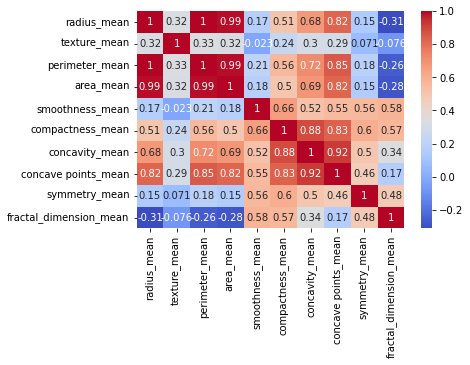

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

Highest correlation columns:
radius_mean and perimeter_mean **(High)**,
area_mean and perimeter_mean**(High)**,
area_mean and radius_mean**(High)**,
concavity_mean and concave_points_mean **(High)**,
concavity_mean and perimeter_mean**(Low)**,
concave_points_mean and perimeter_mean **(Medium)**,
area_mean and concave_points_mean **(Medium)**, 
compactness_mean and concave_points_mean **(Medium)**, 


In [ ]:
df_se=df.iloc[:,12:22]
df_se

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


In [ ]:
df_second_10_cols = df.iloc[:, 12:22]
corr_matrix1 = df_second_10_cols.corr()
print(corr_matrix1)

                      radius_se  texture_se  perimeter_se   area_se  \
radius_se              1.000000    0.213247      0.972794  0.951830   
texture_se             0.213247    1.000000      0.223171  0.111567   
perimeter_se           0.972794    0.223171      1.000000  0.937655   
area_se                0.951830    0.111567      0.937655  1.000000   
smoothness_se          0.164514    0.397243      0.151075  0.075150   
compactness_se         0.356065    0.231700      0.416322  0.284840   
concavity_se           0.332358    0.194998      0.362482  0.270895   
concave points_se      0.513346    0.230283      0.556264  0.415730   
symmetry_se            0.240567    0.411621      0.266487  0.134109   
fractal_dimension_se   0.227754    0.279723      0.244143  0.127071   

                      smoothness_se  compactness_se  concavity_se  \
radius_se                  0.164514        0.356065      0.332358   
texture_se                 0.397243        0.231700      0.194998   
perimeter_s

**We have mapped the correlation values in a heatmap inorder to recognize highly correlated attributes. And then, have seggregated values which are above 0.9 as highly correlated values.**

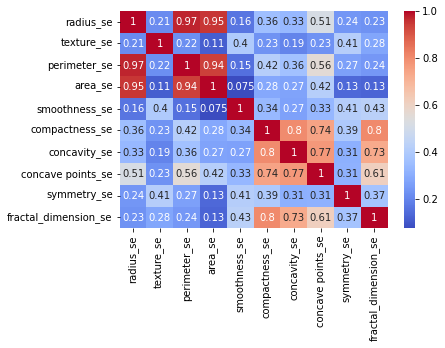

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix1, annot = True, cmap = 'coolwarm')
plt.show()

perimeter_se and radius_se **(High)**, 
area_se and radius_Se **(High)**, 
area_se and perimeter_se **(High)**, 
concave_point_se and compactness_Se **(Low)**, 
concave_points_se and concavity_se **(Low)**,
concavity_se and fractal_dimension_se**(Low)**,
compactness_se and fractal_dimesnison_Se **(Medium)**,
concavity_se and concavity_se and compactness_se(0.8)


In [ ]:
df_worst=df.iloc[:,22:]
corr_matrix2 = df_worst.corr()
print(corr_matrix2)

                         radius_worst  texture_worst  perimeter_worst  \
radius_worst                 1.000000       0.359921         0.993708   
texture_worst                0.359921       1.000000         0.365098   
perimeter_worst              0.993708       0.365098         1.000000   
area_worst                   0.984015       0.345842         0.977578   
smoothness_worst             0.216574       0.225429         0.236775   
compactness_worst            0.475820       0.360832         0.529408   
concavity_worst              0.573975       0.368366         0.618344   
concave points_worst         0.787424       0.359755         0.816322   
symmetry_worst               0.243529       0.233027         0.269493   
fractal_dimension_worst      0.093492       0.219122         0.138957   

                         area_worst  smoothness_worst  compactness_worst  \
radius_worst               0.984015          0.216574           0.475820   
texture_worst              0.345842         

**We have mapped the correlation values in a heatmap inorder to recognize highly correlated attributes. And then, have seggregated values which are above 0.9 as highly correlated values.**

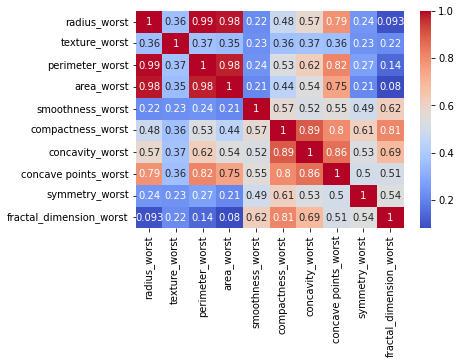

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix2, annot = True, cmap = 'coolwarm')
plt.show()

perimeter_worst and radius_worst **(High)**,
area_worst and radius_worst **(High)**,
concave_points_wors and radius_worst **(Low)**,
area_worst and perimeter_worst **(High)**,
area_worst and concave_points_worst **(Low)**,
perimeter_worst and concave_worst_points **(Medium)**,
compactness_worst and concavity_worst **(Medium)**,
concave points_worst and compactness worst**(Medium)**

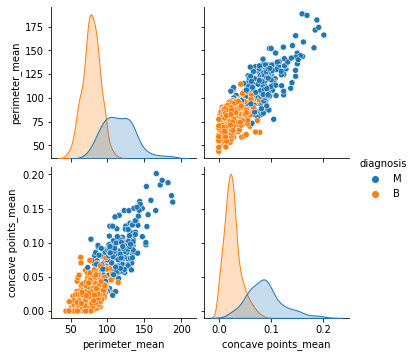

In [ ]:
sns.pairplot(data=df,vars=['perimeter_mean','concave points_mean'],hue='diagnosis')

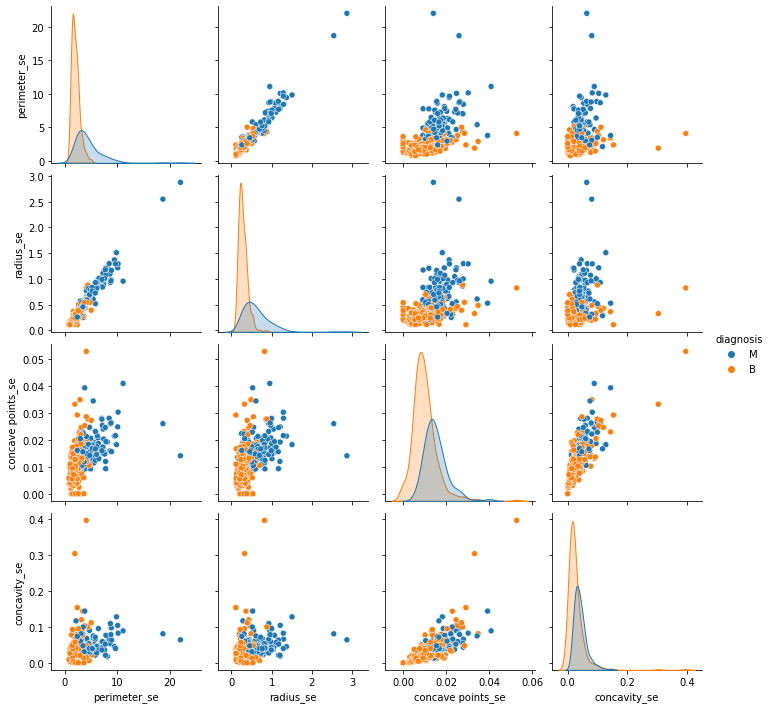

In [ ]:
sns.pairplot(data=df,vars=['perimeter_se','radius_se','concave points_se', 'concavity_se'],hue='diagnosis')

**After plotting the heat map, we understand that the perimeter_worst, radius_worst and area_worst have higher correlation. Therefore, we have plotted a pairplots on these attributes to understand the differences between malignant and benign.**

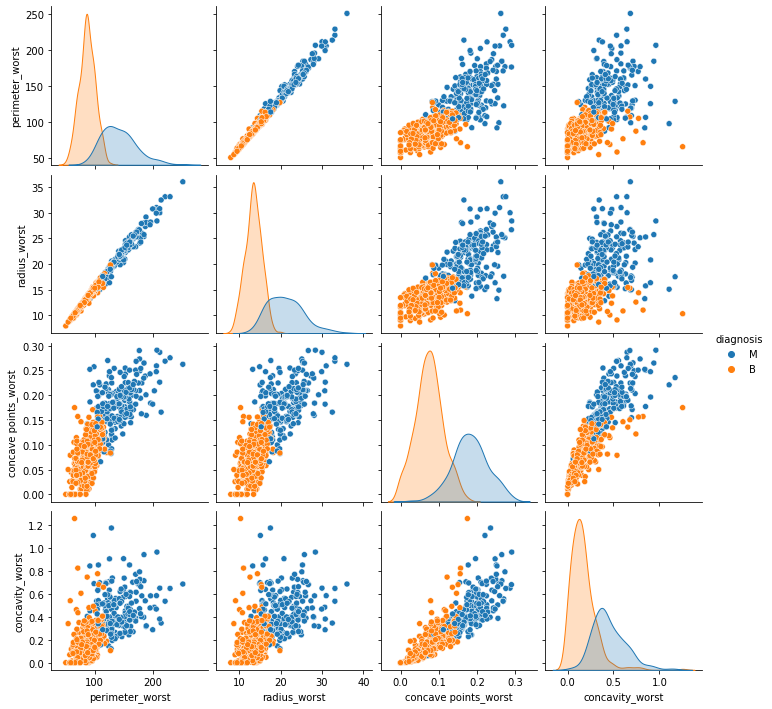

In [ ]:
sns.pairplot(data=df,vars=['perimeter_worst','radius_worst','concave points_worst', 'concavity_worst'],hue='diagnosis')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
corr1 = np.corrcoef(df['radius_worst'], df['diagnosis'])[0,1]
corr1

0.7764537785950386

In [ ]:
corr2 = np.corrcoef(df['perimeter_worst'], df['diagnosis'])[0,1]
corr2

0.7829141371737584

In [ ]:
corr3 = np.corrcoef(df['area_worst'], df['diagnosis'])[0,1]
corr3

0.7338250349210504

In [ ]:
corr4 = np.corrcoef(df['concavity_worst'], df['diagnosis'])[0,1]
corr4

0.6596102103692325

In [ ]:
corr5 = np.corrcoef(df['concave points_worst'], df['diagnosis'])[0,1]
corr5

0.7935660171412687

In [ ]:
corr6 = np.corrcoef(df['compactness_worst'], df['diagnosis'])[0,1]
corr6

0.5909982378417914

In [ ]:
corr7 = np.corrcoef(df['fractal_dimension_se'], df['diagnosis'])[0,1]
corr7

0.07797241739025601

In [ ]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


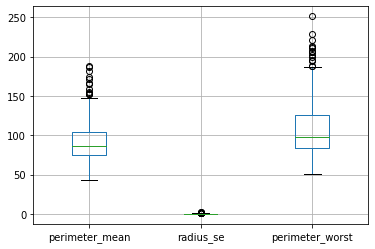

In [ ]:
boxplot1 = df.boxplot(column=['perimeter_mean', 'radius_se','perimeter_worst'])

In [ ]:
cols_to_standardize=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[cols_to_standardize]=scaler.fit_transform(df[cols_to_standardize])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


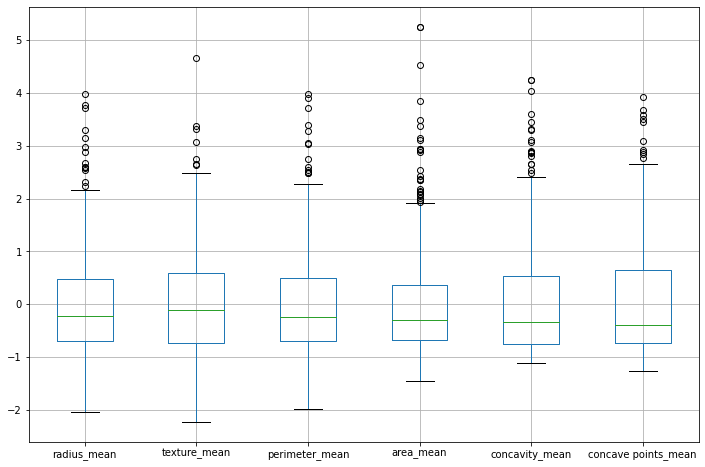

In [ ]:
boxplot1=df.boxplot(column=['radius_mean','texture_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean'],figsize=(12,8))

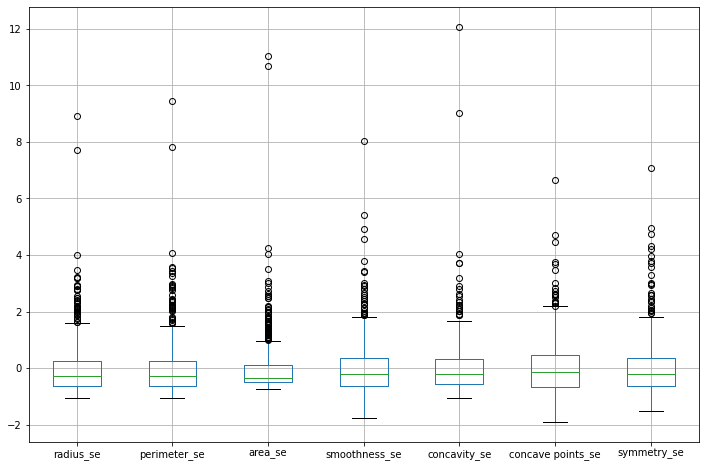

In [ ]:
boxplot2=df.boxplot(column=['radius_se','perimeter_se','area_se','smoothness_se','concavity_se','concave points_se','symmetry_se'],figsize=(12,8))

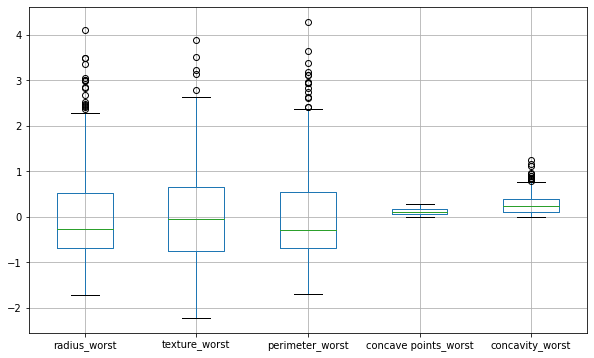

In [ ]:
boxplot3=df.boxplot(column=['radius_worst','texture_worst','perimeter_worst','concave points_worst','concavity_worst'],figsize=(10,6))

In [ ]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,...,-8.241796e-16,1.248757e-17,-3.746271e-16,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
X=df.iloc[:,2:]
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Assume X is a numpy array of features and y is a numpy array of target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test,y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.982
Precision: 0.977
F1 score: 0.977
Confusion Matrix:
 [[70  1]
 [ 1 42]]
Sensitivity: 0.977
Specificity: 0.986
ROC AUC score: 0.997


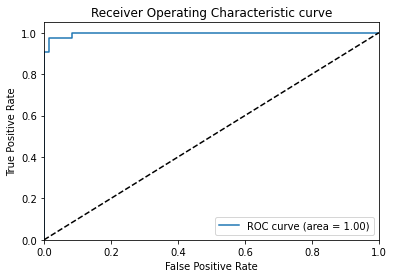

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Initialize a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)
y_predx = rf_clf.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test,y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.965
Precision: 0.976
F1 score: 0.952
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Sensitivity: 0.93
Specificity: 0.986
ROC AUC score: 0.995


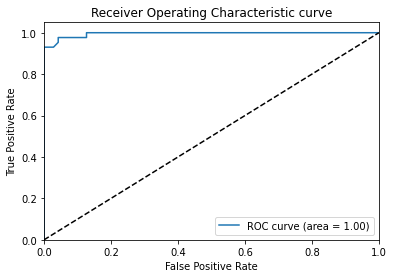

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Initialize a Decision tree
from sklearn.tree import DecisionTreeClassifier
dec_cls = DecisionTreeClassifier()

# Fit the model on the training data
dec_cls.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)
y_predx = rf_clf.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test,y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = dec_cls.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.965
Precision: 0.976
F1 score: 0.952
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Sensitivity: 0.93
Specificity: 0.986
ROC AUC score: 0.944


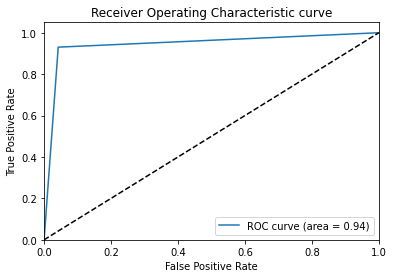

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Initialize a SVM
from sklearn import svm
clf = svm.SVC(kernel='linear') 

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)
y_predx = rf_clf.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test,y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = svm_cls.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.965
Precision: 0.976
F1 score: 0.952
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Sensitivity: 0.93
Specificity: 0.986
ROC AUC score: 0.937


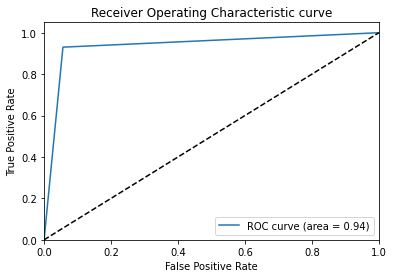

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_cls = GaussianNB()

# Fit the model on the training data
naive_cls.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)
y_predx = rf_clf.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test,y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = naive_cls.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.965
Precision: 0.976
F1 score: 0.952
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Sensitivity: 0.93
Specificity: 0.986
ROC AUC score: 0.997


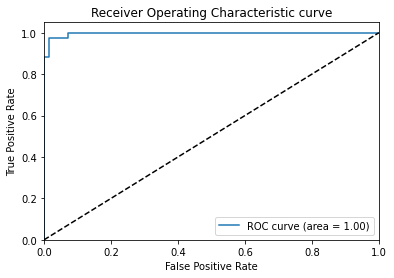

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Initialize a neuralnetworks
from sklearn.neural_network import MLPClassifier
neural_clf = MLPClassifier() 

# Fit the model on the training data
neural_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)
y_predx = rf_clf.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Precision:",round(precision_score(y_test,y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = neural_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

Accuracy: 0.965
Precision: 0.976
F1 score: 0.952
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Sensitivity: 0.93
Specificity: 0.986
ROC AUC score: 0.997


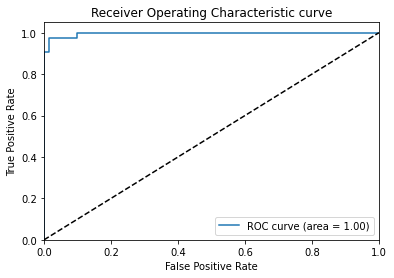

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

Logistic regression is the classification model selected for the above breast cancer dataset.The accuracy for this model is 0.982.This is the highest accuracy from all the above models.The precision score of 0.977 and the misclassification is very low from the below confusion matrix.The ROC AUC score is 0.977 which implies the model is the perfect classifier.The highest specifity implies the model is performing well and the true positives are high and the classification is perfect according to the below roc curve.
High specificity and sensitivity in a binary classification model imply that the model is able to effectively distinguish between positive and negative instances of the target class.

Specificity refers to the proportion of true negatives that are correctly identified as negative by the model. A high specificity means that the model has a low false positive rate and is able to correctly identify most negative instances.

Sensitivity, also known as recall or true positive rate, refers to the proportion of true positives that are correctly identified as positive by the model. A high sensitivity means that the model has a low false negative rate and is able to correctly identify most positive instances.

In summary, a high accuracy,f-1 score,high specificity and sensitivity indicates that the model has a low overall error rate and is able to accurately classify both positive and negative instances of the target class. It is important to note that the optimal balance between specificity and sensitivity may vary depending on the specific application and the cost of false positives and false negatives.

In [ ]:
df['diagnosis'].value_counts()#The dataset is balanced 

0    357
1    212
Name: diagnosis, dtype: int64